#### Take a binary image & perform Rigion Filling Algorithm using morphological operation

In [30]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

shape of the original image: (512, 512)


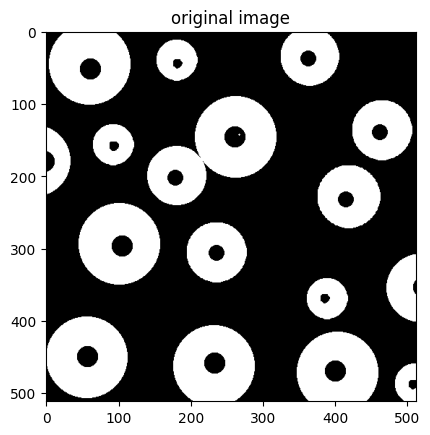

min pixel intensity: 0
max pixel intensity: 255


In [31]:
original_image = cv2.imread('./images/circle.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Function for Region Filling Algorithm

In [79]:
def region_filling(image, st_element, seed_point, max_iter=1e6):
    A = image.copy()
    A_complement = 255 - A #complement of A

    # Create initial seed image
    X = np.zeros_like(image, dtype=np.uint8)
    X[seed_point[0], seed_point[1]] = 255  # seed_point = (x, y)

    # Iterate until region stops growing or max iterations reached
    for i in range(int(max_iter)):
        X_new = cv2.dilate(X, st_element)
        X_new = cv2.bitwise_and(X_new, A_complement)

        if np.array_equal(X, X_new):
            break
        X = X_new

    return ((~(X | A)) | A)

### Applying Region Filling 

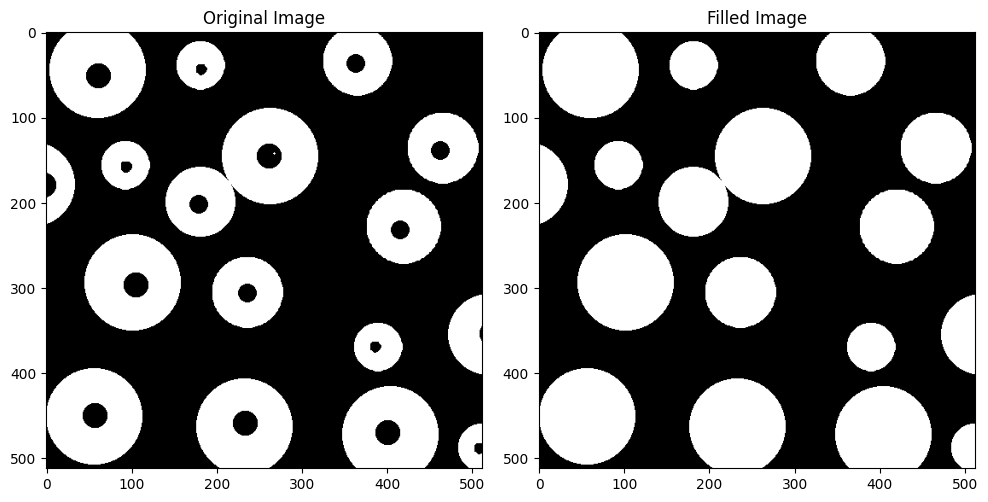

In [80]:
# Structuring element
st_element = np.ones((3, 3), np.uint8)
#initial seed_point x0
seed_point = (0,0)

filled_image = region_filling(original_image, st_element, seed_point)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(filled_image, cmap='gray')
plt.title('Filled Image')

plt.tight_layout()
plt.show()